In [1]:
# !pip install rakun2

In [2]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [6]:
book = "SOMEWT"

In [7]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [8]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [9]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

24
1/chapter1


2023-03-25 08:26:51,577 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
29
2/chapter1
2/chapter2
2/chapter3
2/chapter4
2/chapter5
2/chapter6
2/chapter7
2/chapter8
2/chapter9
2/chapter10
2/chapter11
2/chapter12
2/chapter13
2/chapter14
2/chapter15
2/chapter16
2/chapter17
2/chapter18
2/chapter19
2/chapter20
2/chapter21
2/chapter22
2/chapter23
2/chapter24
2/chapter25
2/chapter26
2/chapter27
2/chapter28
2/chapter29
23
3/chapter1
3/chapter2
3/chapter3
3/chapter4
3/chapter5
3/chapter6
3/chapter7
3/chapter8
3/chapter9
3/chapter10
3/chapter11
3/chapter12
3/chapter13
3/chapter14
3/chapter15
3/chapter16
3/chapter17
3/chapter18
3/chapter19
3/chapter20
3/chapter21
3/chapter22
3/chapter23
47
4/chapter1
4/chapter2
4/chapter3
4/chapter4
4/chapter5
4/chapter6
4/chapter7
4/chapter8
4/chapter9
4/chapter10
4/chap

In [10]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
13
15
14
12
13
12
15
14
15
15
15
15
15
15
14
15
15
15
15
15
15
14
15
14
15
14
14
15
15
15
15
15
14
15
15
15
15
15
15
15
15
14
15
14
12
15
15
14
14
15
15
14
15
14
14
13
13
15
11
14
15
15
15
15
15
15
15
15
15
15
12
14
15
15
15
14
14
14
15
11
14
15
15
15
14
15
14
14
13
14
15
15
15
15
15
15
14
14
14
15
15
15
13
14
14
15
15
12
14
15
13
15
15
14
15
15
15
15
14
15
14
15
15
15
15
14
13
15
14
15
15
14
14
15
15
15
15
15
13
15
15
15
14
15
15
14
15
14
15
13
15
15
15
13
15
15
15
15
15
14
14
15
15
15
15


In [12]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'subjected was superficial', 'relations', 'sufficient sitting', 'appointments', 'deepest convictions', 'sheth haji muhammad haji dada', 'initial insistence', 'proper and announced', 'passengers', 'champaran inquiry', 'permit', 'constitution', 'Chamberlain', 'satyagraha ashram', 'disguise', 'shraddhanandji', 'pledge', 'commanding officer', 'Wellington Convention', 'tyeb sheth', 'gymnastics', 'Court', 'apprenticeship', 'possessing certificate', 'West to receive', 'Baker prayer-meeting', 'vegetarian restaurants', 'unbounded enthusiasm', 'gladly read', 'dinshaw wacha', 'connection remember', 'inadvertently wounded', 'sister son ten', 'strictly observed', 'slivers', 'training on Tolstoy', 'religious authorities', 'suggested', 'pandit rambhaj dutt chowdhari', 'contemptuous connotation', 'municipal authorities', 'shining boots', 'permit officer', 'lakshman jhula', 'hindu girls', 'permission', 'constable', 'indelible impression', 'point of view', 'conscious exaggeration', 'unforgettable consc

In [13]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Grandfather_1869': ['1/chapter1'], 'Multiplication_Tables_1869': ['1/chapter1'], 'Uttamchand_Gandhi_1869': ['1/chapter1'], 'Childhood_1869': ['1/chapter1'], 'Childhood_1887': ['1/chapter8'], 'Childhood_1911': ['4/chapter34'], 'Ota_Gandhi_1869': ['1/chapter1'], 'Outstanding_Impression_1869': ['1/chapter1'], 'Gandhi_1896': ['2/chapter27'], 'Gandhi_1897': ['3/chapter3'], 'Gandhi_1901': ['3/chapter13', '3/chapter16'], 'Gandhi_1915': ['5/chapter39'], 'Karamchand_Gandhi_1869': ['1/chapter1'], 'Bania_Caste_1869': ['1/chapter1'], 'Kaba_Gandhi_1869': ['1/chapter1'], 'Apparent_Discourtesy_1869': ['1/chapter1'], 'Alias_Ota_Gandhi_1869': ['1/chapter1'], 'Teacher_1869': ['1/chapter2', '1/chapter5'], 'Teacher_1914': ['4/chapter36'], 'Incident_Connected_1869': ['1/chapter2'], 'Incidents_Belonging_1869': ['1/chapter2'], 'Literally_Believed_1869': ['1/chapter2'], 'School_1869': ['1/chapter2', '1/chapter5'], 'Rajasthanik_Court_1869': ['1/chapter2'], 'Incident_1869': ['1/cha

In [14]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [15]:
key_yr_chap_mp

defaultdict(list,
            {'Grandfather_1869': ['1/chapter1'],
             'Multiplication_Tables_1869': ['1/chapter1'],
             'Uttamchand_Gandhi_1869': ['1/chapter1'],
             'Childhood_1869': ['1/chapter1'],
             'Childhood_1887': ['1/chapter8'],
             'Childhood_1911': ['4/chapter34'],
             'Ota_Gandhi_1869': ['1/chapter1'],
             'Outstanding_Impression_1869': ['1/chapter1'],
             'Gandhi_1896': ['2/chapter27'],
             'Gandhi_1897': ['3/chapter3'],
             'Gandhi_1901': ['3/chapter13', '3/chapter16'],
             'Gandhi_1915': ['5/chapter39'],
             'Karamchand_Gandhi_1869': ['1/chapter1'],
             'Bania_Caste_1869': ['1/chapter1'],
             'Kaba_Gandhi_1869': ['1/chapter1'],
             'Apparent_Discourtesy_1869': ['1/chapter1'],
             'Alias_Ota_Gandhi_1869': ['1/chapter1'],
             'Teacher_1869': ['1/chapter2', '1/chapter5'],
             'Teacher_1914': ['4/chapter36'],
     

In [16]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Grandfather_1869
Multiplication_Tables_1869
Uttamchand_Gandhi_1869
Childhood_1869
Childhood_1887
Childhood_1911
Ota_Gandhi_1869
Outstanding_Impression_1869
Gandhi_1896
Gandhi_1897
Gandhi_1901
Gandhi_1915
Karamchand_Gandhi_1869
Bania_Caste_1869
Kaba_Gandhi_1869
Apparent_Discourtesy_1869
Alias_Ota_Gandhi_1869
Teacher_1869
Teacher_1914
Incident_Connected_1869
Incidents_Belonging_1869
Literally_Believed_1869
School_1869
Rajasthanik_Court_1869
Incident_1869
Incident_1924
Examination_1869
Examination_1891
Educational_Inspector_1869
Harishchandra_1869
Bear_To_Talk_1869
Indelible_Impression_1869
Porbandar_For_Rajkot_1869
Student_1869
Kathiawad_1869
Kathiawad_1893
Father_1869
Father_1887
Father_1893
Marriage_1869
Marriage_1890
Marriage_1896
Marriage_1906
Time_1869
Time_1887
Time_1915
Betrothal_1869
Wedding_1869
Preliminary_Promise_1869
Coaching_Superfluous_1869
Marriage_Processions_1869
Considerations_Triple_1869
Proper_And_Pleasing_1869
Parents_1869
Preparations_1869
Lustful_Love_1869
Costing_

In [17]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [18]:
url = 'https://en.wikipedia.org/wiki/Mahatma_Gandhi'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Biography', 'Early_life_and_background', 'Three_years_in_London', 'Student_of_law', 'Vegetarianism_and_committee_work', 'Called_to_the_bar', 'Civil_rights_activist_in_South_Africa_(1893–1914)', 'Europeans,_Indians_and_Africans', 'Struggle_for_Indian_independence_(1915–1947)', 'Role_in_World_War_I', 'Champaran_agitations', 'Kheda_agitations', 'Khilafat_movement', 'Non-co-operation', 'Salt_Satyagraha_(Salt_March)', 'Gandhi_as_folk_hero', 'Negotiations', 'Round_Table_Conferences', 'Congress_politics', 'World_War_II_and_Quit_India_movement', 'Partition_and_independence', 'Death', 'Funeral_and_memorials', 'Principles,_practices,_and_beliefs', 'Influences', 'Leo_Tolstoy', 'Shrimad_Rajchandra', 'Religious_texts', 'Sufism', 'On_wars_and_nonviolence', 'Wars', 'Truth_and_Satyagraha', 'Nonviolence', 'On_inter-religious_relations', 'Buddhists,_Jains_and_Sikhs', 'Muslims', 'Christians', 'Jews', 'On_life,_society_and_other_application_of_his_ideas', 'Vegetarianism,_food,_and_animals', 'Fasting', '

In [19]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [20]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [21]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

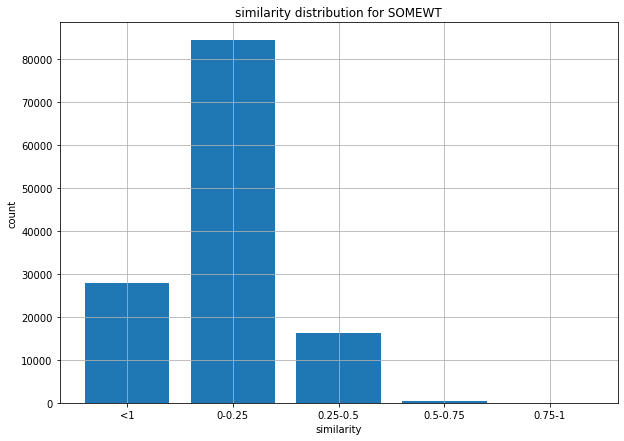

In [22]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

In [23]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
    
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

Biography  ->   ['Understood_1914']
Early_life_and_background  ->   ['Johannesburg_1885', 'Rajkot_To_Resume_1887', 'Rajkot_1887', 'Returned_To_Rajkot_1887', 'Sister_Religions_1887']
Three_years_in_London  ->   ['Understood_1914']
Student_of_law  ->   ['Voyage_1887', 'Hinduism_1887', 'Indian_Ocean_1887', 'Rajkot_To_Resume_1887', 'Rajkot_1887']
Vegetarianism_and_committee_work  ->   ['Christian_Indians_1924', 'Christian_Indians_Living_1924', 'Unwariness_1924', 'Satyagraha_1919', 'Punjab_Situation_1919']
Called_to_the_bar  ->   ['Barristers_1893', 'Indian_Law_1893', 'Virchand_Gandhi_1893', 'Study_Of_Indian_1893', 'Englishmen_And_Boers_1893']
Civil_rights_activist_in_South_Africa_(1893–1914)  ->   ['Gandhi_Settlement_1894', 'Indian_1894', 'India_Agitation_1894', 'Natal_Zulus_1894', 'Indentured_Labourer_1894']
Europeans,_Indians_and_Africans  ->   ['Satyagraha_1912', 'Satyagraha_1906', 'Indian_Opinion_1914', 'Hindu_Brethren_1914', 'Johannesburg_1914']
Struggle_for_Indian_independence_(1915–

In [24]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Champaran_Tenant', 'Pandit_Motilal_Nehru', 'Religions', 'Satyagraha', 'Ota_Gandhi', 'Voyage', 'Tolstoy', 'Unwariness', 'Returned_To_Rajkot', 'Opinion', 'Special_Session', 'Vegetarianism', 'Kheda_Satyagraha_Struggle', 'Plantations', 'Kheda_Campaign_Satyagraha', 'Maulana_Abdul_Bari', 'Disobedience', 'Punjab', 'Rajkot', 'Indian', 'Peace_Celebrations', 'Manganlal_Gandhi', 'Gokhale', 'Strike', 'Study_Of_Indian', 'Viceroy', 'Jalianwala_Bagh_Massacre', 'Barristers', 'Jalianwala_Bagh_Tragedy', 'India_Agitation', 'Vegetarianism_Strengthened', 'Training_On_Tolstoy', 'Muslim_Demand', 'Jalianwala_Bagh_Memorial', 'Hindus', 'South_African_Experiences', 'Kheda_Satyagraha', 'Pandit', 'Swami_Vivekananda', 'Advocate', 'Indian_Opinion', 'Maharajas_For_Donations', 'Indians', 'Diet', 'Satyagrahi_Volunteers', 'Vegetarian_Restaurants', 'Christian_Indians', 'Alias_Ota_Gandhi', 'Vegetarian_Diet', 'Punjab_Situation', 'Satyagrahi', 'Chhaganlal_Gandhi', 'Englishmen_And_Boers', 'Punjab_Government', 'Hindu_Wife',

In [25]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)

3694
{'European_Vegetarian_Union', 'Dean_Ornish', 'Bharathidasan', 'United_Nations_General_Assembly', 'Charles_Canning,_1st_Earl_Canning', 'Palestine_(region)', 'Richard_H._Schwartz', 'Affluenza', 'Special:BookSources/978-81-7099-037-6', 'Gandhism', 'Category:Articles_with_short_description', 'Category:Articles_with_PortugalA_identifiers', 'Libertarianism', 'Leo_Strauss', 'Economic_vegetarianism', 'Nana_Saheb_Peshwa_II', 'Special:BookSources/978-0-88706-331-2', 'Jim_Merkel', 'Ishwar_Chandra_Vidyasagar', 'File:Mountbattens_with_Gandhi_(IND_5298).jpg', 'Special:BookSources/978-0-19-515634-8', 'Thirty-nine_Reasons_Why_I_Am_a_Vegetarian', 'Associated_Press', 'Sentientism', 'Special:BookSources/978-1-4742-2173-3', 'Our_Hen_House', 'Category:Articles_with_LibriVox_links', 'Conservatism', 'Jaswant_Singh', 'Nikita_Khrushchev', 'Elmer_McCollum', 'Pradesh_Congress_Committee', 'Special:BookSources/978-0-521-86362-9', 'Miso', 'Political_integration_of_India', 'Subhas_Chandra_Bose', 'Second_Anglo-S

In [26]:
hyperlinks_present = final_keywords & urls
print(hyperlinks_present)
len(hyperlinks_present)

{'Satyagraha', 'Kheda_Satyagraha', 'Tolstoy', 'Swami_Vivekananda', 'Kheda', 'Indian_Opinion', 'Hindu', 'Mahatma', 'Mohanlal_Pandya', 'Vegetarianism', 'Rajkot', 'Tolstoy_Farm', 'Johannesburg', 'Maganlal_Gandhi', 'Hinduism', 'Brahmacharya', 'Vegetarian_Society', 'Karamchand_Gandhi', 'Ahimsa'}


19

In [27]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Rajkot_1887', 'Satyagraha_1906', 'Barristers_1893', 'Indian_Opinion_1906', 'English_Youths_1890', 'Virchand_Gandhi_1893', 'Advocate_1890', 'Champaran_Tenant_1917', 'Vegetarianism_1912', 'Kheda_1919', 'Diet_1919', 'Shraddhanandji_1919', 'Christian_Indians_1896', 'Peace_Celebrations_1915', 'South_African_1890', 'African_Experiences_1890', 'South_African_Experiences_1890', 'Gandhi_Settlement_1894', 'Hindu_Wife_1897', 'Vegetarian_Diet_1890', 'Religions_1887', 'Punjab_1919', 'Returned_To_Rajkot_1887', 'Hindu_Husband_1897', 'Grandfather_1869', 'Indian_Ocean_1887', 'Maulana_Abdul_Bari_1920', 'Pandit_Motilal_Nehru_1915', 'Hindu_Brethren_1914', 'Jalianwala_Bagh_Tragedy_1919', 'Abdulla_Sheth_1924', 'Rajkot_To_Resume_1887', 'Farm_1911', 'Soldiers_1914', 'Viceroy_1919', 'Indian_Law_1893', 'Hindu_1893', 'Chhaganlal_Gandhi_1904', 'Brahmacharya_1912', 'Voyage_1887', 'Special_Session_1920', 'Indian_Home_Rule_1914', 'Satyagrahi_1919', 'Sister_Religions_1887', 'Vegetarian_Society_1890', 'Kheda_Satyagr

In [28]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Grandfather_1869': ['1/chapter1'], 'Uttamchand_Gandhi_1869': ['1/chapter1'], 'Ota_Gandhi_1869': ['1/chapter1'], 'Gandhi_1896': ['2/chapter27'], 'Gandhi_1901': ['3/chapter13', '3/chapter16'], 'Gandhi_1915': ['5/chapter39'], 'Karamchand_Gandhi_1869': ['1/chapter1'], 'Bania_Caste_1869': ['1/chapter1'], 'Kaba_Gandhi_1869': ['1/chapter1'], 'Alias_Ota_Gandhi_1869': ['1/chapter1'], 'Religions_1887': ['1/chapter9'], 'Hinduism_1887': ['1/chapter9'], 'Sister_Religions_1887': ['1/chapter9'], 'Returned_To_Rajkot_1887': ['1/chapter11'], 'Voyage_1887': ['1/chapter11'], 'Indian_Ocean_1887': ['1/chapter11'], 'Sheth_1924': ['2/chapter8', '2/chapter9'], 'Rajkot_To_Resume_1887': ['1/chapter11'], 'Rajkot_1887': ['1/chapter11'], 'Vegetarian_1890': ['1/chapter17'], 'Vegetarianism_1890': ['1/chapter16', '1/chapter17'], 'Vegetarianism_1912': ['4/chapter30'], 'Diet_1919': ['5/chapter28'], 'Vegetarian_Diet_1890': ['1/chapter16'], 'Vegetarian_Society_1890': ['1/chapter17'], 'Vegetarian_Restaurants_1890': ['1/c

In [29]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['rajkot', 'satyagraha', 'barristers', 'indian opinion', 'english youths', 'virchand gandhi', 'advocate', 'champaran tenant', 'vegetarianism', 'kheda', 'diet', 'shraddhanandji', 'christian indians', 'peace celebrations', 'south african', 'african experiences', 'south african experiences', 'gandhi settlement', 'hindu wife', 'vegetarian diet', 'religions', 'punjab', 'returned to rajkot', 'hindu husband', 'grandfather', 'indian ocean', 'maulana abdul bari', 'pandit motilal nehru', 'hindu brethren', 'jalianwala bagh tragedy', 'abdulla sheth', 'rajkot to resume', 'farm', 'soldiers', 'viceroy', 'indian law', 'hindu', 'chhaganlal gandhi', 'brahmacharya', 'voyage', 'special session', 'indian home rule', 'satyagrahi', 'sister religions', 'vegetarian society', 'kheda satyagraha', 'indigo plantations', 'mahatma munshiramji', 'jalianwala bagh massacre', 'maganlal gandhi', 'gandhi', 'rajkumar shukla', 'strike', 'gandhi', 'karamchand gandhi', 'satyagraha', 'kheda campaign satyagraha', 'manganlal gan

In [30]:
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

45
124
0.3629032258064516
